<a href="https://colab.research.google.com/github/cabbi120101/TIL/blob/master/ML/%EC%9E%90%EC%8A%B5DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 케라스 파이썬 라이브러리를 사용하여 손글씨 숫자 분류 학습

---



In [ ]:
pip install keras

In [ ]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [ ]:
# 학습 데이터 확인
train_images.shape # 8비트 정수형 3D 텐서임

(60000, 28, 28)

In [ ]:
# 축의 개수 확인 : ndim
train_images.ndim
# 3 : 3D (3차원 : 3개의 축으로 구성)
# 28 X 28 크기의 정수 행렬이 6만개가 있는 배열

3

In [ ]:
len(train_labels)

60000

In [ ]:
# 테스트 데이터 확인

test_images.shape

(10000, 28, 28)

In [ ]:
# 레이블 확인
train_labels

# dtype=uint8 : 0~255 범위로 양수만 표현이 가능한 2^8개 만큼 표현이 가능

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

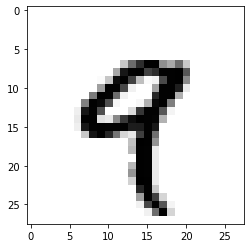

In [ ]:
# 다섯 번째 샘플을 맷플롯립 라이브러리를 사용해서 확인 
import matplotlib.pyplot as plt

digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
# 데이터 전처리 : 2차원으로 변환
# 0과 1 사이의 값을 가지는 float32 타입의 
# (60000, 28 * 28) 크기의 2차원 배열로 변경 (60000, 784)

train_images = train_images.reshape(60000,28*28)
train_images = train_images.astype('float32')/255


# (10000, 28 * 28) 크기의 2차원 배열로 변경 (10000, 784)

test_images = test_images.reshape(10000,28*28)
test_images = test_images.astype('float32')/255

In [ ]:
train_images.ndim # 2차원으로 변환됨

2

In [ ]:
# 레이블을 범주형으로 인코딩
from tensorflow.keras.utils import to_categorical


train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import tensorflow as tf

tf.random.set_seed(3)

# (1) 모델 설정
# 딥러닝의 구조와 층을 설정하는 단계
network = Sequential() # 일반적으로 modle로 많이 사용
network.add(Dense(512, activation='relu', input_shape=(28*28,)))
network.add(Dense(10, activation='softmax'))

# (2) 컴파일 : loss, optimizer, metrics 설정 단계 
network.compile(optimizer='rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

# (3) 모델 실행 (학습)
network.fit(train_images, train_labels, epochs=5, batch_size=128)

# (4) 모델 평가
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc : ', test_acc)
print('test_loss : ', test_loss)

# 손실은 점점 작아지고 정확도는 높아짐

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2582 - accuracy: 0.9255
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1024 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0679 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0492 - accuracy: 0.9852
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0721 - accuracy: 0.9792
test_acc :  0.979200005531311
test_loss :  0.07208354026079178


## 영화 리뷰 : 이진 분류 예제

In [ ]:
# 데이터 셋 로드
# 처음 실행하면 17MB 정도의 데이터가 다운로드 됨

from keras.datasets import imdb
import warnings
warnings.filterwarnings('ignore')

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# train_data, train_labels, test_data, test_labels = imdb.load_data(num_words=10000) # 괄호 없으면 오류

# num_words=10000
# 훈련 데이터에서 가장 자주 나타나는 단어 10,000개만 사용하겠다는 의미
# 드물게 나타나는 단어는 무시
# 이렇게 하면 적절한 크기의 벡터 데이터를 얻을 수 있음

In [ ]:
# num_words=10000
# 가장 자주 등장하는 단어 10,000개로 제한했기 때문에
# 단어 인덱스는 10,000을 넘지 않음
max([max(sequence) for sequence in train_data])

9999

In [ ]:
# 원-핫 인코딩 사용해서 리스트를 변환

import numpy as np

def vectorize_sequence(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension)이고 모둔 원소가 0인 행렬 생성
    # (25000, 10000)
    results = np.zeros((len(sequences), dimension)) # 모두 0으로 채움
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.    # results[i]에서 특정 인덱스의 위치를 1로 만듦
        
    return results

# 훈련 데이터를 벡터로 변환
x_train = vectorize_sequence(train_data)

# 테스트 데이터를 벡터로 변환
x_test = vectorize_sequence(test_data)

In [ ]:
# 레이블을 float32 형으로 변한
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
# (1) 모델 설정

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

tf.random.set_seed(3)

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 중간의 은닉층은 활성화 함수로 'relu' 사용
# - 음수는 0으로 만듦

# 마지막 층은 확률을 출력하기 위해 시그모이드 활성화 함수 사용
# - 0과 1사이의 점수로
# - 어떤 샘플이 타식 1일 가능성이 높다는 것은
# - 글 리뷰가 긍정일 가능성이 높다는 것을 의미

In [ ]:
# (2) 모델 컴파일
# 손실 함수와 옵티마이저 선택해서 모델을 설정하는 단계
# 'rmsprop' 옵티마이저와
# binary_crossentropy 손실 함수 선택

from tensorflow.keras import optimizers

# model.compile(optimizer='rmsprop',
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

### 훈련 검증

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
# (3) 모델 실행(학습)
# Matplotlib을 사용해 훈련과 검증 데이터에 대한 손실과 정확도를 시각화하기 위해
# model.fit() 메서드 반환하는 History 객체 생성
# 이 객체에는 훈련하는 동안 발생한 모든 정보를 가지고 있음
# 딕셔너리 형태의 history 속성을 가지고 있음

history = model.fit(partial_x_train, 
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

# loss, accuracy, val_loss,  val_accuracy
# 훈련 손실, 훈련 정확도, 검증 손실, 검증 정확도

Epoch 1/20
30/30 [==============================] - 3s 49ms/step - loss: 0.5036 - accuracy: 0.7921 - val_loss: 0.3853 - val_accuracy: 0.8607
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3022 - accuracy: 0.9043 - val_loss: 0.3229 - val_accuracy: 0.8758
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2249 - accuracy: 0.9263 - val_loss: 0.3136 - val_accuracy: 0.8709
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1766 - accuracy: 0.9443 - val_loss: 0.2813 - val_accuracy: 0.8867
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1467 - accuracy: 0.9521 - val_loss: 0.2816 - val_accuracy: 0.8856
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1183 - accuracy: 0.9645 - val_loss: 0.2946 - val_accuracy: 0.8843
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0982 - accuracy: 0.9701 - val_loss: 0.3084 - val_accuracy: 0.8823
Epoch 8/20
30

In [ ]:
# model.fit()이 반환한 history 속성 확인 (딕셔너리)
history_dict = history.history
history_dict.keys()

# 훈련과 검증하는 동안 모니터링할 측정 지표 포함
# loss, accuracy, val_loss,  val_accuracy
# 훈련 손실, 훈련 정확도, 검증 손실, 검증 정확도

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
import matplotlib.pyplot as plt

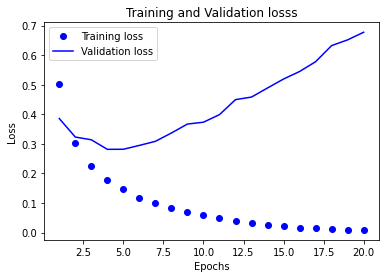

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# 훈련 손실과 검증 손실 시각화
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and Validation losss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

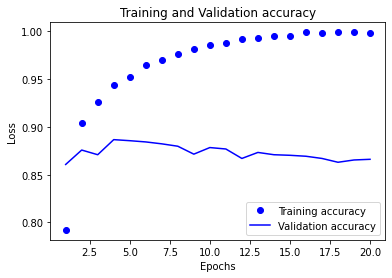

In [ ]:
# 훈련 정확도와 검증 정확도 시각화

plt.clf()  # 그래프 초기화
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 프로젝트 데이터 불러오기

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/멀티캠/머신러닝/8월 5일/dlvr_call.csv')
df.head(20)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,3486929,2019-12-01,C000101,1,C000101,S0021950,족발/보쌈,1156013200,서울특별시,영등포구,신길동,\N,1156066000,115603000023,1159010800,서울특별시,동작구,대방동,\N,1159066000,115904157098,D0006140,3300,200,18000,1,승인:KB국민카드,2019-12-01 20:47:52,2019-12-01 20:48:11,2019-12-01 20:55:33,2019-12-01 21:00:15,\N
1,3486930,2019-12-01,C000099,1,C000099,S0039210,치킨,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412854379205,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412853193037,D0005898,2900,0,21900,1,승인:현대카드사,2019-12-01 21:58:07,2019-12-01 22:01:06,2019-12-01 22:20:53,2019-12-01 22:26:01,\N
2,3486932,2019-12-01,C000029,1,C000043,S0036135,치킨,4115010100,경기도,의정부시,의정부동,\N,4115051000,411504343421,4115011100,경기도,의정부시,녹양동,\N,4115062000,411504343083,D0000864,3500,200,19500,2,NaN,2019-12-01 22:20:31,2019-12-01 22:37:45,2019-12-01 22:58:27,2019-12-01 22:58:32,\N
3,3486933,2019-12-01,C000105,1,C000105,S0039956,돈까스/일식,4128510400,경기도,고양시 일산동구,장항동,\N,4128559000,412854379097,4128510500,경기도,고양시 일산동구,마두동,\N,4128556000,412854379158,D0001526,3500,0,18000,2,NaN,2019-12-01 21:40:39,2019-12-01 21:48:41,2019-12-01 22:06:35,2019-12-01 22:17:57,\N
4,3486934,2019-12-01,C000028,1,C000043,S0003074,치킨,4115010900,경기도,의정부시,금오동,\N,4115058000,411504343342,4115010900,경기도,의정부시,금오동,\N,4115058000,411503181019,D0000986,3500,200,18000,3,NaN,2019-12-01 19:44:37,2019-12-01 19:48:07,2019-12-01 19:54:30,2019-12-01 20:00:22,\N
5,3486940,2019-12-01,C000237,1,C000237,S0021813,아시안/양식,4121010100,경기도,광명시,광명동,\N,4121055000,412103187064,4121010200,경기도,광명시,철산동,\N,4121060000,412103187028,D0003991,3300,200,19000,2,NaN,2019-12-01 19:08:19,2019-12-01 19:37:13,2019-12-01 19:58:04,2019-12-01 19:58:06,\N
6,3486941,2019-12-01,C000250,1,C000250,S0019514,족발/보쌈,4119011300,경기도,부천시,괴안동,\N,4119079500,411903185010,4119010700,경기도,부천시,역곡동,\N,4119060600,411904352372,D0004334,3000,200,32000,1,승인:KB국민카드,2019-12-01 21:17:12,2019-12-01 21:17:50,2019-12-01 21:23:22,2019-12-01 21:36:15,\N
7,3486942,2019-12-01,C000240,1,C000238,S0020310,카페/디저트,4119011400,경기도,부천시,송내동,\N,4119074600,411904355059,4119010800,경기도,부천시,중동,\N,4119074200,411903184007,D0004845,4500,200,17500,2,NaN,2019-12-01 21:18:23,2019-12-01 21:19:58,2019-12-01 21:48:09,2019-12-01 21:48:59,\N
8,3486943,2019-12-01,C000254,1,C000254,S0021038,치킨,4119010800,경기도,부천시,중동,\N,4119061000,411904352531,4119010900,경기도,부천시,상동,\N,4119074400,411904352050,D0005264,3500,200,15500,2,NaN,2019-12-01 18:37:31,2019-12-01 19:08:13,2019-12-01 19:26:18,2019-12-01 19:28:36,\N
9,3486946,2019-12-01,C000049,1,C000049,S0022458,패스트푸드,1153010800,서울특별시,구로구,오류동,\N,1153077000,115304148076,1153010900,서울특별시,구로구,궁동,\N,1153079000,115304148440,D0004578,3000,400,11500,2,NaN,2019-12-01 20:22:17,2019-12-01 20:37:16,2019-12-01 20:44:49,2019-12-01 21:04:42,\N


In [3]:
df['DLVR_STORE_BRTC_NM'].unique()

array(['서울특별시', '경기도'], dtype=object)

In [4]:
data = df.copy()
data.head()

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,3486929,2019-12-01,C000101,1,C000101,S0021950,족발/보쌈,1156013200,서울특별시,영등포구,신길동,\N,1156066000,115603000023,1159010800,서울특별시,동작구,대방동,\N,1159066000,115904157098,D0006140,3300,200,18000,1,승인:KB국민카드,2019-12-01 20:47:52,2019-12-01 20:48:11,2019-12-01 20:55:33,2019-12-01 21:00:15,\N
1,3486930,2019-12-01,C000099,1,C000099,S0039210,치킨,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412854379205,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412853193037,D0005898,2900,0,21900,1,승인:현대카드사,2019-12-01 21:58:07,2019-12-01 22:01:06,2019-12-01 22:20:53,2019-12-01 22:26:01,\N
2,3486932,2019-12-01,C000029,1,C000043,S0036135,치킨,4115010100,경기도,의정부시,의정부동,\N,4115051000,411504343421,4115011100,경기도,의정부시,녹양동,\N,4115062000,411504343083,D0000864,3500,200,19500,2,NaN,2019-12-01 22:20:31,2019-12-01 22:37:45,2019-12-01 22:58:27,2019-12-01 22:58:32,\N
3,3486933,2019-12-01,C000105,1,C000105,S0039956,돈까스/일식,4128510400,경기도,고양시 일산동구,장항동,\N,4128559000,412854379097,4128510500,경기도,고양시 일산동구,마두동,\N,4128556000,412854379158,D0001526,3500,0,18000,2,NaN,2019-12-01 21:40:39,2019-12-01 21:48:41,2019-12-01 22:06:35,2019-12-01 22:17:57,\N
4,3486934,2019-12-01,C000028,1,C000043,S0003074,치킨,4115010900,경기도,의정부시,금오동,\N,4115058000,411504343342,4115010900,경기도,의정부시,금오동,\N,4115058000,411503181019,D0000986,3500,200,18000,3,NaN,2019-12-01 19:44:37,2019-12-01 19:48:07,2019-12-01 19:54:30,2019-12-01 20:00:22,\N


In [5]:
data['DLVR_STORE_INDUTY_NM'].unique()

array(['족발/보쌈', '치킨', '돈까스/일식', '아시안/양식', '카페/디저트', '패스트푸드', '분식', '회',
       '야식', '한식', '배달전문업체', '중식', '피자', '찜탕', '도시락', '심부름'], dtype=object)